## Task 1 of Data science and Business Analytics Internships

### Author - Shivam Sharma

#### Problem statement

What will be the predicted score if a student studies for 9.25hrs a day?

##### Import the necessary Libraries.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


##### Step 1- Understand the data

In [128]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [129]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [130]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [131]:
data.shape

(25, 2)

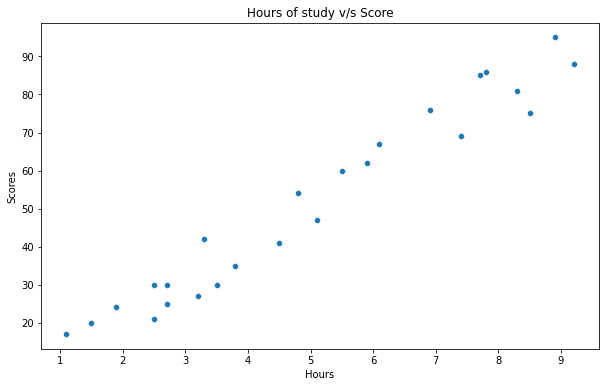

In [132]:
## plot a graph to visualize the data for positive relation.

plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x="Hours",y="Scores")
plt.title("Hours of study v/s Score")
plt.show()

### Result - From the given graph we get the positive linear correlation.

##### Step-2 Checking of NULL values or Cleaning the data.

In [133]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As you can see here, there is no null values in the data.Hence, our data is cleaned.

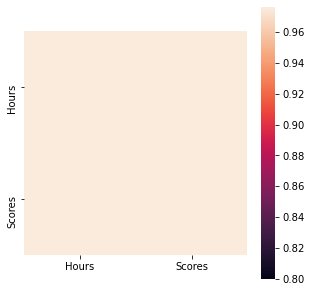

In [134]:
## Let's visualize it with the heat map.
corrmat = data.corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

As you can see in the Heat map, there is no sign of null values,which indicates our data is clean.

##### Step-3 Train and Test the Model.

In [135]:
X =(data['Hours'].values).reshape(-1,1)
y =data['Scores'].values

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [137]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [138]:
print('Intercept value is:',linreg.intercept_)
print('Linear coefficient is:',linreg.coef_)


Intercept value is: -1.5369573315500702
Linear coefficient is: [10.46110829]


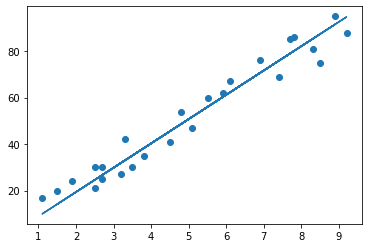

In [139]:
#Visualize the model graphicaly.
line = linreg.coef_*X+linreg.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

Hence,from this graph we get a perfect Linear line.

In [140]:
#Let's do the prediction
predictions = linreg.predict(X_test)

In [141]:
predictions

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

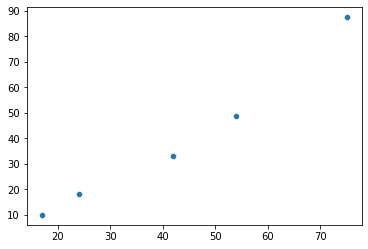

In [142]:
#visualize the predicted output graphicaly
sns.scatterplot(y_test,predictions)

#### Now,find out the solution of given problem statement

What will be the predicted score if a student studies for 9.25hrs/day?

In [143]:
hours = np.array([9.25,1])
hours.reshape(-1,1)
study = linreg.predict(hours.reshape(-1,1))
print("The predicted score for 9.25hrs of study will be:",study[0])

The predicted score for 9.25hrs of study will be: 95.22829438402952


### Model evaluation

In [144]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report,confusion_matrix

In [145]:
print("Mean Absolute error:",mean_absolute_error(y_test,predictions))
print("Mean Squared error:",mean_squared_error(y_test,predictions))
print("R2 square:",r2_score(y_test,predictions))


Mean Absolute error: 7.882398086270432
Mean Squared error: 68.88092074277635
R2 square: 0.8421031525243527



## Conclusion